In [11]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

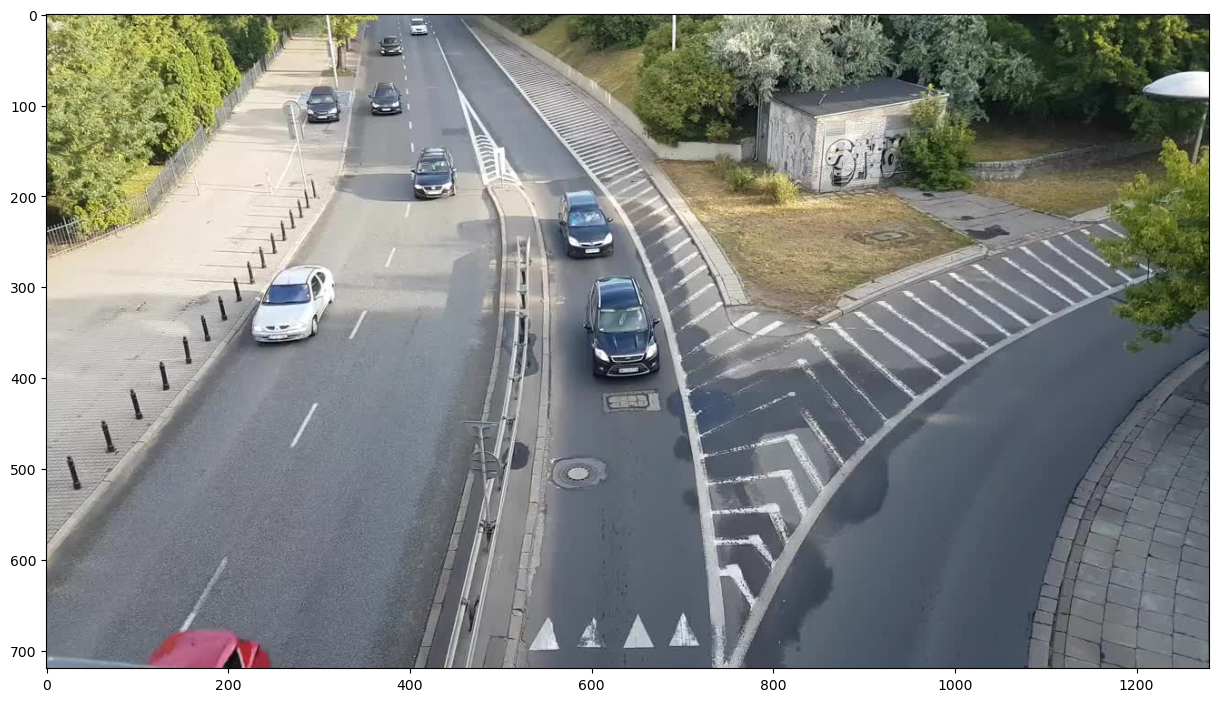

In [12]:
# Load the dataset
folder = './data/traffic_camera'
frames = os.listdir(folder)
frames.sort()

img = cv2.imread(os.path.join(folder, frames[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) 

In [13]:
class Track:
    def __init__(self, tracker, points, color, step=1, total=20) -> None:
        self.tracker = tracker
        self.color = color
        self.step = step
        self.total = total
        self.results = []

        lt_x,  lt_y, rb_x, rb_y = points
        template_width = rb_x - lt_x
        template_height = rb_y - lt_y

        img = cv2.imread(os.path.join(folder, frames[0]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        tracker.init(img,  (lt_x, lt_y, template_width, template_height))


    def track(self):
        for i in range(self.total):
            frame = cv2.imread(os.path.join(folder, frames[i*self.step]))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            self.last_frame = frame

            ok, bbox = self.tracker.update(frame)

            self.results.append((ok, bbox))

    def show_results_on(self, img):
        for r in self.results:
            ok, bbox = r
            if not ok: continue

            x, y, width, height = bbox
            cv2.rectangle(img, (x, y), (x+width, y+height), self.color, 1)


In [14]:
car1 = [(399, 4, 420, 23), (0, 255, 0, 20)]
car2 = [(354, 74, 393, 113), (255, 0, 0, 20)]
car3 = [(401, 144, 452, 205), (0, 0, 255, 20)]

def test_tracker(tracker_factory):
    track_1 = Track(tracker_factory(), car1[0], car1[1])
    track_1.track()

    track_2 = Track(tracker_factory(), car2[0], car2[1])
    track_2.track()

    track_3 = Track(tracker_factory(), car3[0], car3[1])
    track_3.track()

    img = cv2.imread(os.path.join(folder, frames[0]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) + track_1.last_frame.astype(np.float32)*0.3

    track_1.show_results_on(img)
    track_2.show_results_on(img)
    track_3.show_results_on(img)

    plt.imshow(img.clip(0, 255).astype(np.uint8))

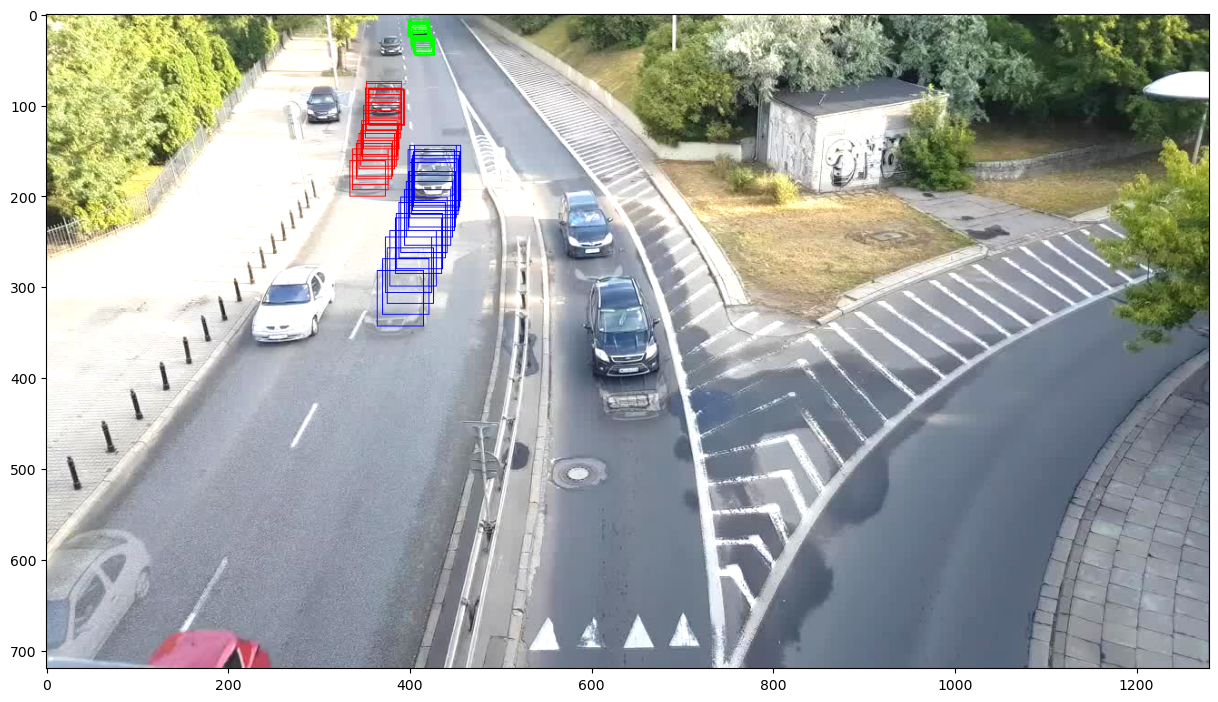

In [15]:
test_tracker(cv2.TrackerMIL_create)

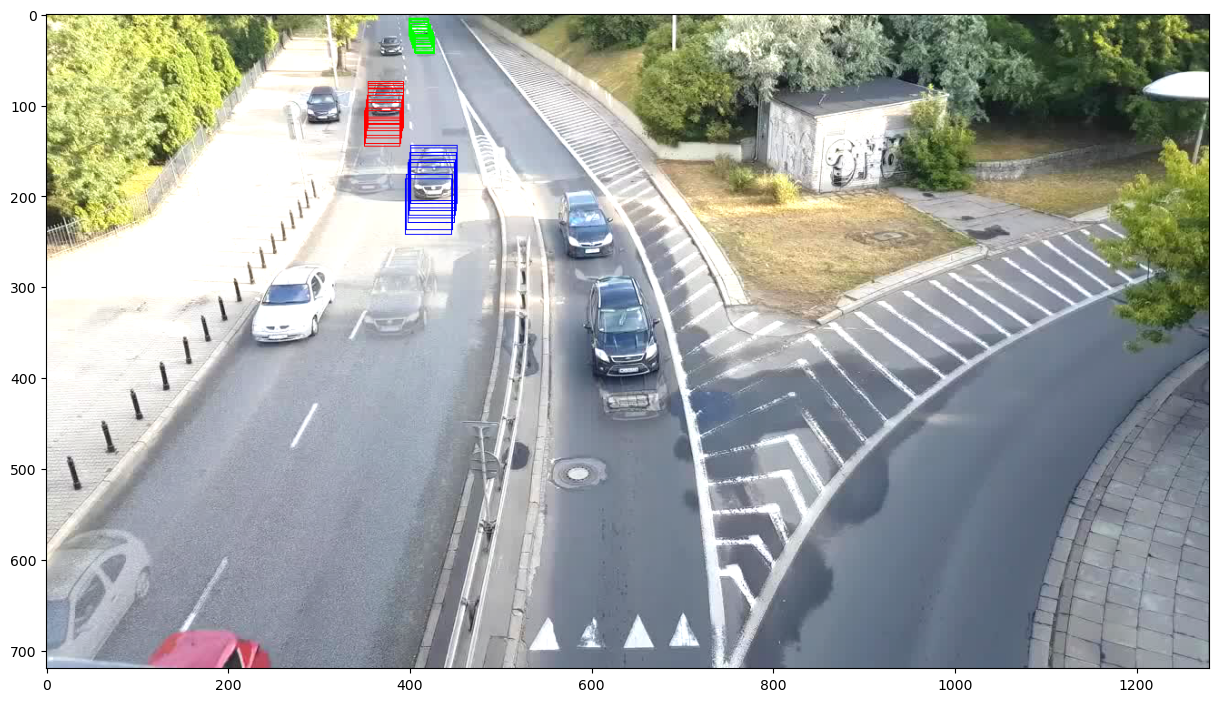

In [16]:
test_tracker(cv2.TrackerKCF_create)

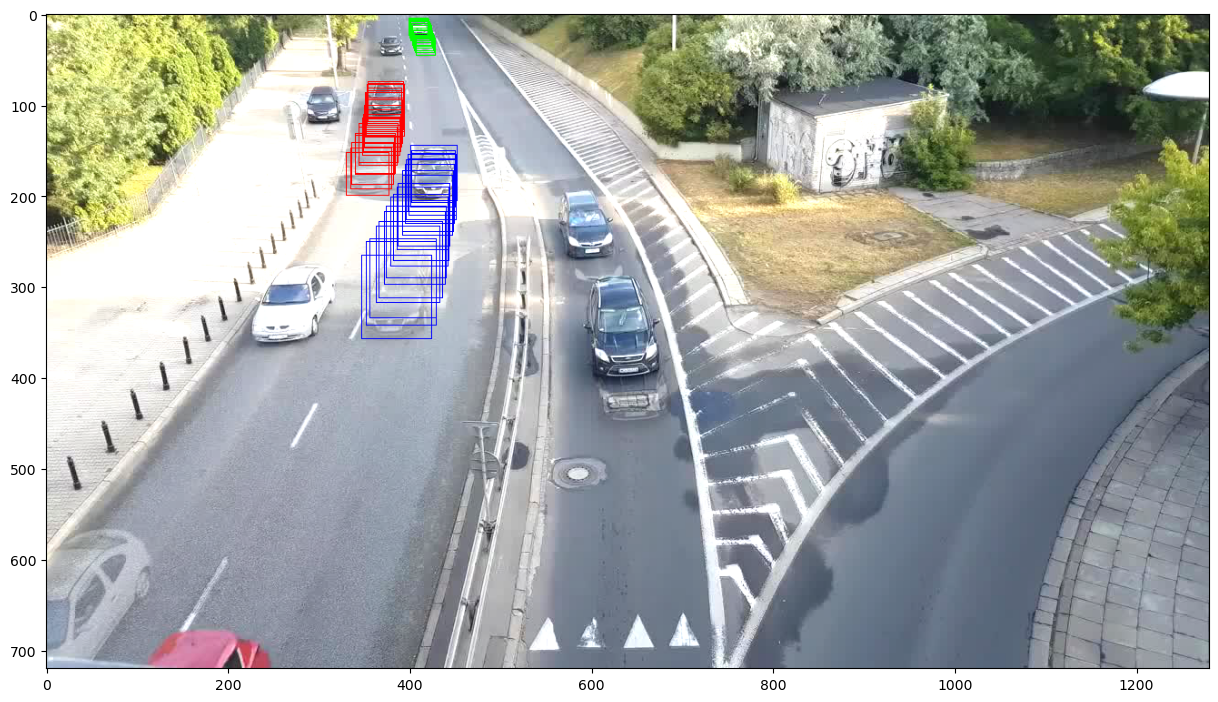

In [17]:
test_tracker(cv2.TrackerCSRT_create)

MILworks surprisingly pretty good in this case, even that cars becomes closer. There is a jitter of bounding boxes, but it still tracks all cars.

KCF lose all cars very quickly.

CSRT tracker is the best! It tracks very accurete every target car and increse its's boundind boxes when car becomes closer to camera. 